In [1]:
import fsc
from fsc.devices import w7x
import numpy as np

In [2]:
fsc.resolve.importOfflineData("../w7x.fsc")

In [3]:
tracer = fsc.tracer()

In [6]:
geoGrid = w7x.defaultGeometryGrid
geometry = tracer.indexGeometry(w7x.divertor(), grid = geoGrid)
geometry

(indexed = (base = <external capability>, grid = (xMin = -7, xMax = 7, yMin = -7, yMax = 7, zMin = -1.5, zMax = 1.5, nX = 200, nY = 200, nZ = 60), data = <external capability>))

In [7]:
fsc.data.writeArchive(geometry.geometry, 'geometry.fsc')

In [4]:
geoGrid = w7x.defaultGeometryGrid
geometry = fsc.Geometry(fsc.data.readArchive('geometry.fsc'))

In [5]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc")
config = w7x.standard(coils = archiveCoils)
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
tracer.trace([6.2, 0, 0], config, grid = grid, geometryGrid = geoGrid, geometry = geometry, distanceLimit = 2e3)

Computed field obtained
Indexed geometry obtained
Starting trace


namespace(endPoints=array([3.43600565, 3.67088938, 0.07192287]))

In [13]:
points = np.linspace([5.6, 0.0, 0.0], [6.0, 0, 0], 10, axis = 1)
points = [6.2, 0, 0]
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 200, config, grid, distanceLimit = 5e3, stepSize = 1e-3)

Assigning
Tracing
Done


In [14]:
xl, yl, zl = fsc.geometry.planarCut(geometry, geoLib = tracer.geometryLib, phi = 0)
rl = np.sqrt(xl**2 + yl**2)

Creating request
Getting plane
Setting phi
Setting center
Sending request


(5.279870849420378, 6.243620668097223, -1.1064351042245493, 1.1064351042245493)

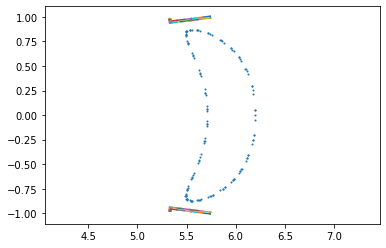

In [15]:
for v1, v2 in zip(rl, zl):
    plt.plot(v1, v2)

x, y, z = pcPoints
r = np.sqrt(x**2 + y**2)
plt.scatter(r, z, s = 1)

plt.axis('equal')

In [10]:
xl.shape

(224, 2)